<a href="https://colab.research.google.com/github/Ranjani94/Deep_Learning/blob/master/Assignment2/keras_Fruits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Fruits and vegetable Multi class classification using CNN and keras

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Deep_Learning/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import L1L2
from keras.callbacks import ReduceLROnPlateau

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import confusion_matrix
import itertools


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2

print(tf.__version__)


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.2.0-rc3


###Loadin the data from scikit library

In [0]:
filepath = base_dir + '/Fruit_dataset/Training/'

In [0]:
np.random.seed(1234)
#directory="../input/fruits-360_dataset/fruits-360/Training/"
classes=["Apple Red 1","Beetroot","Lemon","Pomegranate"]

all_arrays=[]
img_size=100
for i in classes:
    path=os.path.join(filepath,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),
                             cv2.IMREAD_GRAYSCALE)
        img_array=cv2.resize(img_array,(img_size,img_size))
        all_arrays.append([img_array,class_num])

In [0]:
filepath2 = base_dir + '/Fruit_dataset/Test/'
classes2=["Apple Red 1","Beetroot","Lemon","Pomegranate"]

all_arrays2=[]
img_size=100
for i in classes2:
    path=os.path.join(filepath2,i)
    class_num2=classes2.index(i)
    for img in os.listdir(path):
        img_array2=cv2.imread(os.path.join(path,img),
                             cv2.IMREAD_GRAYSCALE)
        img_array2=cv2.resize(img_array2,(img_size,img_size))
        all_arrays2.append([img_array2,class_num2])


In [0]:
fruits_array_train=[]
for features,label in all_arrays:
    fruits_array_train.append(features)

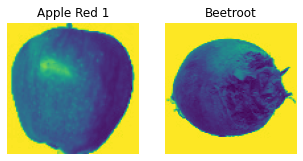

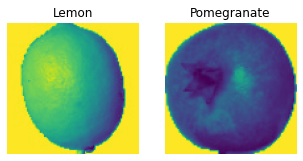

In [0]:
location=[[1,500],[1150,1500]]
fruit_names=["Apple Red 1","Beetroot","Lemon","Pomegranate"]
a=0
b=1
c=2
for i,j in location:
    plt.subplots(figsize=(8,8))
    plt.subplot(1,3,1)
    plt.imshow(fruits_array_train[i])
    plt.title(fruit_names[a])
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(fruits_array_train[j])
    plt.title(fruit_names[b])
    plt.axis("off")
    # plt.subplot(1,3,3)
    # plt.imshow(fruits_array_train[k])
    # plt.title(fruit_names[c])
    # plt.axis("off")
    a+=2
    b+=2
    # c+=3

In [0]:
import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train) #arraying

import random
random.shuffle(all_arrays2)

X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test) #arraying

In [0]:
#normalization and reshaping
X_train=X_train.reshape(-1,img_size,img_size,1)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,1)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (1926, 100, 100, 1)
shape of X_test=   (642, 100, 100, 1)


In [0]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=9)
Y_test=to_categorical(Y_test,num_classes=9)

In [0]:
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [0]:
x_train.shape

(1540, 100, 100, 1)

In [0]:
x_val.shape

(386, 100, 100, 1)

In [0]:
y_train.shape

(1540, 9)

In [0]:
y_val.shape

(386, 9)

In [0]:
model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(100,100,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

epochs=20
batch_size=36

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 100, 100, 8)       208       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 50, 50, 16)        2064      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 25, 25, 32)       

In [0]:
datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=False, #divide input datas to std
                           samplewise_std_normalization=False,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           rotation_range=0.5,    #rotate 5 degree
                           zoom_range=0.5,        #zoom in-out 5%
                           width_shift_range=0.5, #shift 5%
                           height_shift_range=0.5,
                           horizontal_flip=False,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(x_train)

In [0]:
#model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )


Epoch 1/20
42/42 [==============================] - 15s 348ms/step - loss: 0.3249 - accuracy: 0.2546 - val_loss: 0.2675 - val_accuracy: 0.2694
Epoch 2/20
42/42 [==============================] - 14s 339ms/step - loss: 0.2485 - accuracy: 0.3185 - val_loss: 0.2463 - val_accuracy: 0.2591
Epoch 3/20
42/42 [==============================] - 14s 340ms/step - loss: 0.2168 - accuracy: 0.4661 - val_loss: 0.2076 - val_accuracy: 0.5000
Epoch 4/20
42/42 [==============================] - 14s 340ms/step - loss: 0.1838 - accuracy: 0.5758 - val_loss: 0.1768 - val_accuracy: 0.5440
Epoch 5/20
42/42 [==============================] - 14s 340ms/step - loss: 0.1678 - accuracy: 0.6130 - val_loss: 0.2285 - val_accuracy: 0.5104
Epoch 6/20
42/42 [==============================] - 14s 339ms/step - loss: 0.1611 - accuracy: 0.6410 - val_loss: 0.2428 - val_accuracy: 0.4870
Epoch 7/20
42/42 [==============================] - 14s 340ms/step - loss: 0.1459 - accuracy: 0.6915 - val_loss: 0.1051 - val_accuracy: 0.9326

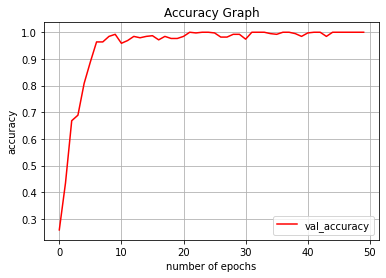

In [0]:
plt.plot(history.history["val_accuracy"],color="r",label="val_accuracy")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

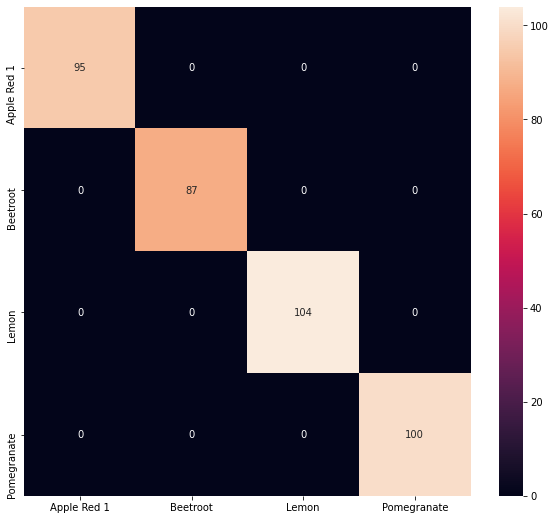

In [0]:
#confusion matrix
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=["Apple Red 1","Beetroot","Lemon","Pomegranate"]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

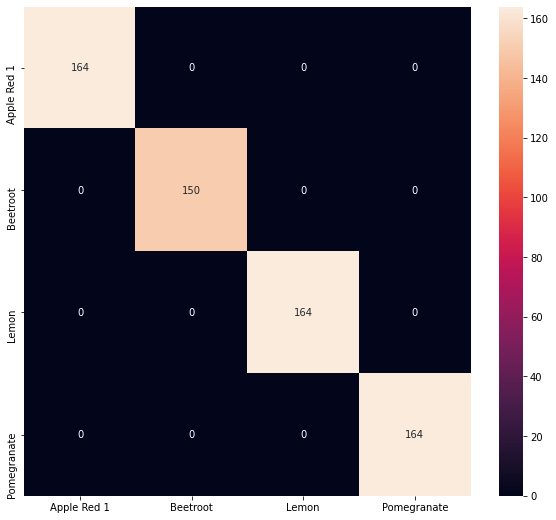

In [0]:
#confusion matrix
y_pred2=model.predict(X_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(Y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()